In [1]:
import pickle
with open('./saves/hidden_2048_2048_relu_lr_0.1_decay_0.95_l2_0.0001/model.pkl', 'rb') as f:
    weights, biases = pickle.load(f)

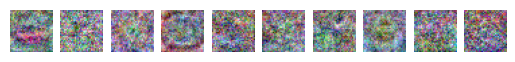

In [2]:
import numpy as np
import matplotlib.pyplot as plt

weight_matrix = weights[0]  
height, width, channels = 32, 32, 3

num_filters_to_visualize = 10

for i in range(num_filters_to_visualize):
    filter_weights = weight_matrix[:, i]
    filter_image = filter_weights.reshape(channels, height, width).transpose(1, 2, 0)

    filter_image = (filter_image - np.min(filter_image)) / (np.max(filter_image) - np.min(filter_image))

    plt.subplot(1, num_filters_to_visualize, i + 1)
    plt.imshow(filter_image)
    plt.axis('off')

plt.show()

In [3]:
from utils.dataset import Dataset
test_dataset = Dataset(type='test')
test_X, test_Y = test_dataset.get_all_data()

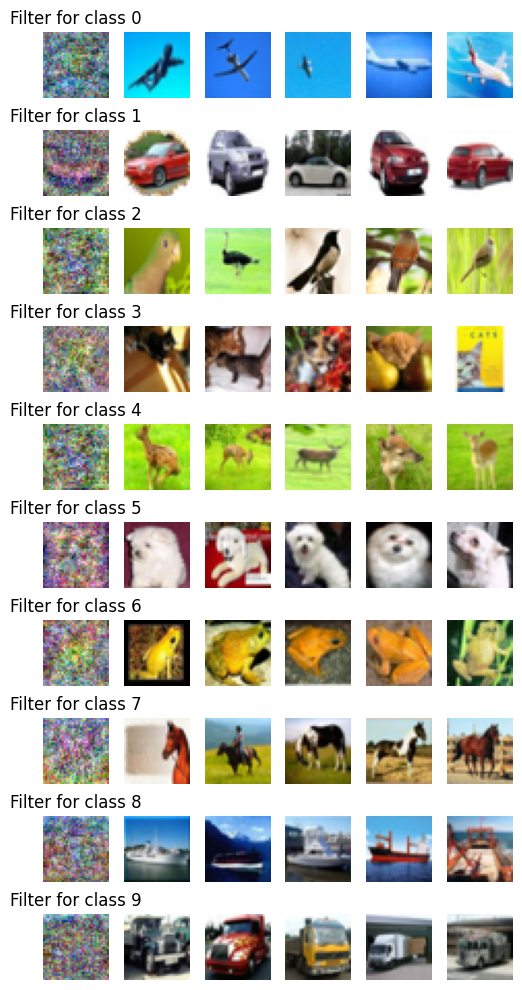

In [4]:
num_classes = 10

plt.figure(figsize=(5, 10))

for class_to_visualize in range(num_classes):
    class_indices = np.where(test_Y[:, class_to_visualize] == 1)[0]
    class_images = test_X[class_indices]

    activation_scores = np.dot(class_images, weight_matrix)
    average_activation_per_filter = np.mean(activation_scores, axis=0)

    top_filter_index = np.argmax(average_activation_per_filter)

    filter_weights = weight_matrix[:, top_filter_index]
    filter_image = filter_weights.reshape(channels, height, width).transpose(1, 2, 0)

    filter_image = (filter_image - np.min(filter_image)) / (np.max(filter_image) - np.min(filter_image))

    plt.subplot(num_classes, 6, class_to_visualize * 6 + 1)
    plt.imshow(filter_image)
    plt.title(f"Filter for class {class_to_visualize}")
    plt.axis('off')

    top_filter_index = np.argmax(average_activation_per_filter)
    top_filter_activation_scores = activation_scores[:, top_filter_index]
    top_indices = np.argsort(top_filter_activation_scores)[::-1][:5]
    top_images = class_images[top_indices]
    for i in range(5):
        img = top_images[i].reshape(channels, height, width).transpose(1, 2, 0)
        img = (img - np.min(img)) / (np.max(img) - np.min(img))
        plt.subplot(num_classes, 6, class_to_visualize * 6 + i + 2)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()